In [1]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import numpy as np
import cartopy
import pandas as pd

In [2]:
# https://argopy.readthedocs.io/en/latest/data_fetching.html#For-one-or-more-floats
from argopy import IndexFetcher as ArgoIndexFetcher


/home/nrw/v3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nrw/v3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


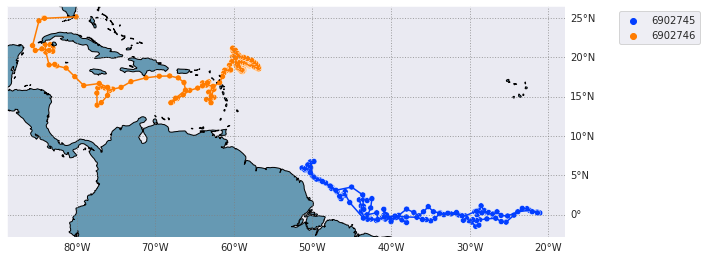

In [3]:
idx = ArgoIndexFetcher(cache=True).float([6902745, 6902746])
a = idx.to_dataframe()
b = idx.plot('trajectory')

/home/nrw/v3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nrw/v3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


(<Figure size 720x720 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

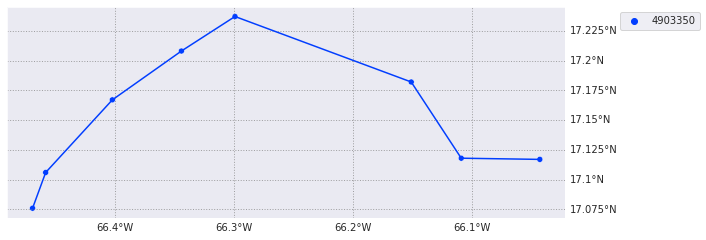

In [4]:
#num = 7900579
num_2021_deploy = 4903350
idx_small = ArgoIndexFetcher(cache=True).float([num_2021_deploy])
df = idx_small.to_dataframe()
idx_small.plot('trajectory')

In [43]:
df['coordinates'] = list(zip(df.longitude, df.latitude)) 

In [44]:
df_ = df[['coordinates', 'date_update']]
df_

,coordinates,date_update
0,"(-66.469, 17.076)",2021-04-27 00:04:28
1,"(-66.458, 17.106)",2021-04-28 17:01:26
2,"(-66.402, 17.167)",2021-04-30 02:00:37
3,"(-66.344, 17.208)",2021-05-01 11:00:27
4,"(-66.299, 17.237)",2021-05-11 09:00:55
5,"(-66.151, 17.182)",2021-05-21 07:00:42
6,"(-66.109, 17.118)",2021-05-31 04:00:35
7,"(-66.043, 17.117)",2021-05-31 04:00:35


In [45]:
df_.to_dict('series')['date_update']

0   2021-04-27 00:04:28
1   2021-04-28 17:01:26
2   2021-04-30 02:00:37
3   2021-05-01 11:00:27
4   2021-05-11 09:00:55
5   2021-05-21 07:00:42
6   2021-05-31 04:00:35
7   2021-05-31 04:00:35
Name: date_update, dtype: datetime64[ns]

In [46]:
df_.to_dict('series')['coordinates']

0    (-66.469, 17.076)
1    (-66.458, 17.106)
2    (-66.402, 17.167)
3    (-66.344, 17.208)
4    (-66.299, 17.237)
5    (-66.151, 17.182)
6    (-66.109, 17.118)
7    (-66.043, 17.117)
Name: coordinates, dtype: object

In [47]:
df_.date_update[0]
pos0 = [df.longitude[0], df.latitude[0]]
pos1 = [df.longitude[1], df.latitude[1]]
pos2 = [df.longitude[2], df.latitude[2]]
pos3 = [df.longitude[3], df.latitude[3]]
pos4 = [df.longitude[4], df.latitude[4]]
pos5 = [df.longitude[5], df.latitude[5]]

In [48]:
import folium
from folium import plugins

In [49]:
#m = folium.Map(location=[35.68159659061569, 139.76451516151428], zoom_start=16)

# YYYY-MM-DD HH:mm:ss
# https://python-visualization.github.io/folium/plugins.html#folium.plugins.TimestampedGeoJson

# Lon, Lat order.
'''
lines = [
    { "coordinates": ( pos0, pos1 ),
        "dates": ["2017-06-02 00:00:00", "2017-06-02 00:10:00"], "color": "red", },
    { "coordinates": [ pos1, pos2 ],
        "dates": ["2017-06-02 00:10:00", "2017-06-02 00:20:00"], "color": "blue", },
    { "coordinates": [ pos2, pos3],
        "dates": ["2017-06-02 00:20:00", "2017-06-02 00:30:00"], "color": "green"},#, "weight": 15, },
    { "coordinates": [ pos3, pos4],
        "dates": ["2017-06-02 00:30:00", "2017-06-02 00:40:00"], "color": "#FFFFFF", },
]
'''
lines = df_.to_dict('series')
#print('lines', lines)

display(df_)
print(df_.dtypes)
#df_ = df_.astype('object')
#df_['features'] = ['hi']

,coordinates,date_update
0,"(-66.469, 17.076)",2021-04-27 00:04:28
1,"(-66.458, 17.106)",2021-04-28 17:01:26
2,"(-66.402, 17.167)",2021-04-30 02:00:37
3,"(-66.344, 17.208)",2021-05-01 11:00:27
4,"(-66.299, 17.237)",2021-05-11 09:00:55
5,"(-66.151, 17.182)",2021-05-21 07:00:42
6,"(-66.109, 17.118)",2021-05-31 04:00:35
7,"(-66.043, 17.117)",2021-05-31 04:00:35


coordinates            object
date_update    datetime64[ns]
dtype: object


In [50]:
#features = [
    #{ "type": "Feature", "geometry": { "type": "LineString", "coordinates": line["coordinates"], },
        #"properties": { "times": line["date_update"], "style": { "color": 'red', "weight": 5},
        #},
    #}
    #for line in lines ]
    
# df['New_Sample'] = df.Sample.apply(lambda x: x[:1])
pd.set_option('display.max_colwidth', None)
df_['line_coords'] = list(zip(df_['coordinates'].shift(), df_['coordinates']))
df_['line_times'] = list(zip(
    df_['date_update'].shift().dt.strftime('%Y-%m-%d %H:%M:%S'), 
    df_['date_update'].dt.strftime('%Y-%m-%d %H:%M:%S')
))
#df_['line_times'] = list(zip(df_['date_update'], df_['date_update'].shift()))
display(df_)

<ipython-input-50-e9e5c280da2c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['line_coords'] = list(zip(df_['coordinates'].shift(), df_['coordinates']))
<ipython-input-50-e9e5c280da2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['line_times'] = list(zip(


,coordinates,date_update,line_coords,line_times
0,"(-66.469, 17.076)",2021-04-27 00:04:28,"(nan, (-66.469, 17.076))","(nan, 2021-04-27 00:04:28)"
1,"(-66.458, 17.106)",2021-04-28 17:01:26,"((-66.469, 17.076), (-66.458, 17.106))","(2021-04-27 00:04:28, 2021-04-28 17:01:26)"
2,"(-66.402, 17.167)",2021-04-30 02:00:37,"((-66.458, 17.106), (-66.402, 17.167))","(2021-04-28 17:01:26, 2021-04-30 02:00:37)"
3,"(-66.344, 17.208)",2021-05-01 11:00:27,"((-66.402, 17.167), (-66.344, 17.208))","(2021-04-30 02:00:37, 2021-05-01 11:00:27)"
4,"(-66.299, 17.237)",2021-05-11 09:00:55,"((-66.344, 17.208), (-66.299, 17.237))","(2021-05-01 11:00:27, 2021-05-11 09:00:55)"
5,"(-66.151, 17.182)",2021-05-21 07:00:42,"((-66.299, 17.237), (-66.151, 17.182))","(2021-05-11 09:00:55, 2021-05-21 07:00:42)"
6,"(-66.109, 17.118)",2021-05-31 04:00:35,"((-66.151, 17.182), (-66.109, 17.118))","(2021-05-21 07:00:42, 2021-05-31 04:00:35)"
7,"(-66.043, 17.117)",2021-05-31 04:00:35,"((-66.109, 17.118), (-66.043, 17.117))","(2021-05-31 04:00:35, 2021-05-31 04:00:35)"


In [55]:
features = []
for i, row in df_.iterrows():
    if i == 0:
        continue
    feature =  { "type": "Feature", 
                "geometry": { "type": "LineString", 
                             "coordinates": row.line_coords, },
        "properties": { "times": row.line_times, "style": { "color": 'red', "weight": 5},
        },
    }
    features.append(feature)

In [52]:
print(len(features))
features

7


[{'type': 'Feature',
  'geometry': {'type': 'LineString',
   'coordinates': ((-66.469, 17.076), (-66.458, 17.106))},
  'properties': {'times': ('2021-04-27 00:04:28', '2021-04-28 17:01:26'),
   'style': {'color': 'red', 'weight': 15}}},
 {'type': 'Feature',
  'geometry': {'type': 'LineString',
   'coordinates': ((-66.458, 17.106), (-66.402, 17.167))},
  'properties': {'times': ('2021-04-28 17:01:26', '2021-04-30 02:00:37'),
   'style': {'color': 'red', 'weight': 15}}},
 {'type': 'Feature',
  'geometry': {'type': 'LineString',
   'coordinates': ((-66.402, 17.167), (-66.344, 17.208))},
  'properties': {'times': ('2021-04-30 02:00:37', '2021-05-01 11:00:27'),
   'style': {'color': 'red', 'weight': 15}}},
 {'type': 'Feature',
  'geometry': {'type': 'LineString',
   'coordinates': ((-66.344, 17.208), (-66.299, 17.237))},
  'properties': {'times': ('2021-05-01 11:00:27', '2021-05-11 09:00:55'),
   'style': {'color': 'red', 'weight': 15}}},
 {'type': 'Feature',
  'geometry': {'type': 'LineStr

In [56]:
#df_['feature'] = df_.apply(f, axis=1)
m = folium.Map(location=[17.106, -66.402], zoom_start=7, width=800, height=300)
plugins.TimestampedGeoJson(
    { "type": "FeatureCollection", "features": features},
    period="P1D", add_last_point=False,
).add_to(m)

m

In [16]:
m.save('test_folium.html')